<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hypothesis-Test-for-Significance" data-toc-modified-id="Hypothesis-Test-for-Significance-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Hypothesis Test for Significance</a></span></li><li><span><a href="#Uncertainty" data-toc-modified-id="Uncertainty-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Uncertainty</a></span></li><li><span><a href="#Bayesian-Model" data-toc-modified-id="Bayesian-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bayesian Model</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use("style.mplstyle")  # A matplotlib "style" file to make plots look more like those in astro papers.

# Hypothesis Test for Significance

> **Our results are significant and not due to random chance**

## Setting up the Hypothesis Test
**Null hypothesis ($H_0$)**
: A testable hypothesis often stating that a feature of the **data is insigificant and due to random chance**. 
    
**Alternative hypothesis ($H_A$)**
: Any other hypothesis often stating that a feature of the **data is significant and not due to random chance**.

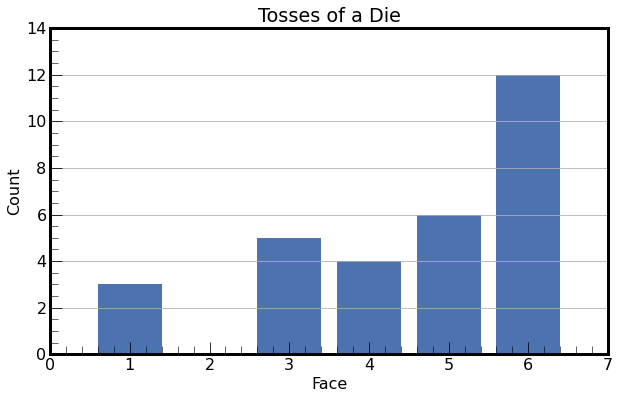

In [2]:
die_tosses_30 = np.repeat(
    (1,2,3,4,5,6),
    (3,0,5,4,6,12)
)

faces, counts = np.unique(die_tosses_30, return_counts=True)
plt.bar(faces, counts)
plt.title("Tosses of a Die")
plt.xlabel("Face")
plt.ylabel("Count")
plt.grid(axis='y')

## Population

A set of all possible things from the group you want to study (e.g., the Milky Way stellar population contains all the starts in the Milky Way).

The mathematical notion of this a space (a set of values) called the **outcome space** and in statistical mechanics this is renamed as the **ensemble**.

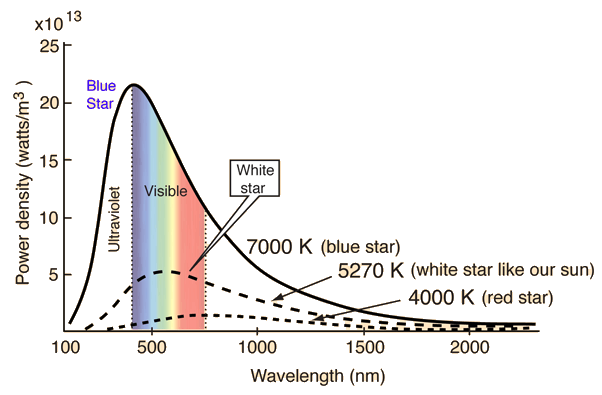

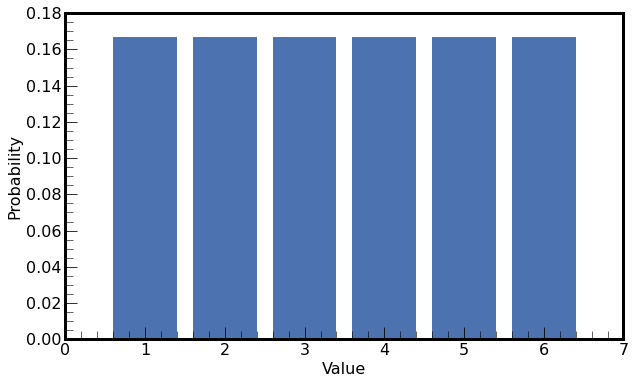

In [4]:
die_faces = (1, 2, 3, 4, 5, 6)
die_probs = [1/6] * 6

plt.bar(die_faces, die_probs)
plt.xlabel("Value")
plt.ylabel("Probability")
plt.show()

## Sampling
To collect more data by taking a subset of a population.

* **Empirical Sample**: A sample taken from the population by actual observations/measurements. 
* **Simulated Sample**: A sample taken from the population by taking values from some numerical process that attempts to estimate the population.

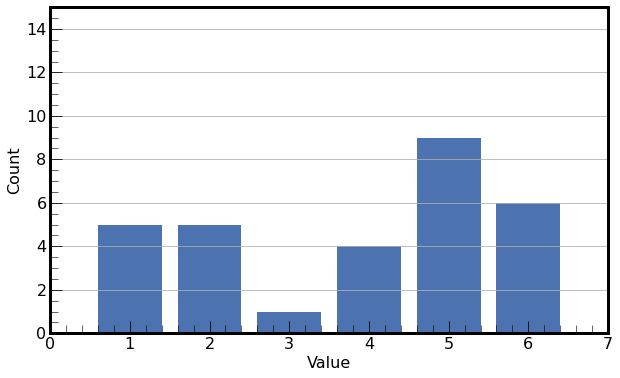

In [5]:
def roll(die_faces, die_probs, nrolls):
    roll = np.random.choice(die_faces, p=die_probs, size=nrolls)
    return roll

result = roll(die_faces, die_probs, nrolls=30)
faces, counts = np.unique(result, return_counts=True) 
plt.bar(faces, counts)

plt.grid(axis='y')
plt.xlabel("Value")
plt.ylabel("Count")
plt.ylim(0, 15)
plt.show()

## Null Hypothesis Test

Also known as "Monte Carlo hypothesis test"



In [6]:
def calculate_stats(sample):
    """Returns the proportion of "6" in the given sample (rolls of a die)."""
    sample = np.array(sample)
    # Typically you can do 
    # np.sum(sample == 6) / len(sample)
    
    # However, doesn't the above looks like an average of something?
    return np.mean(sample == 6)

def simulate(die_faces, die_probs, nrolls, reps=1000):
    """Simulate `nrolls` tosses of a die given the die faces and probabilities for each side. Repeat the simulation
    `reps` time calculating the statistics (as defined in `calculate_stats`) and return a numpy array of those statistics."""
    results = []
    
    for i in range(reps):
        sample = roll(die_faces, die_probs, nrolls)
        stats = calculate_stats(sample)
        results.append(stats)
        
    return np.array(results)

(array([ 40.,  73., 135., 184., 170., 166., 110.,  59.,  33.,  30.]),
 array([0.        , 0.03666667, 0.07333333, 0.11      , 0.14666667,
        0.18333333, 0.22      , 0.25666667, 0.29333333, 0.33      ,
        0.36666667]),
 <BarContainer object of 10 artists>)

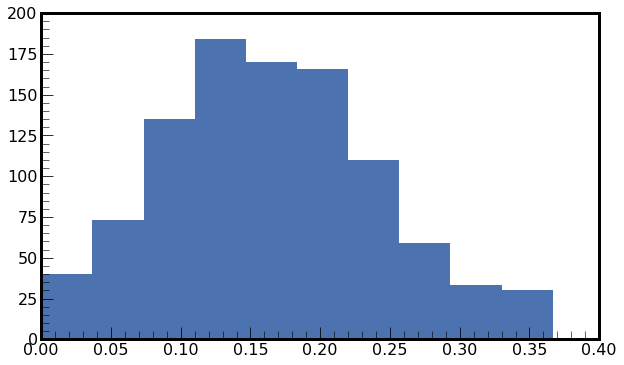

In [7]:
results = simulate(die_faces, die_probs, nrolls=30, reps=1000)
plt.hist(results)

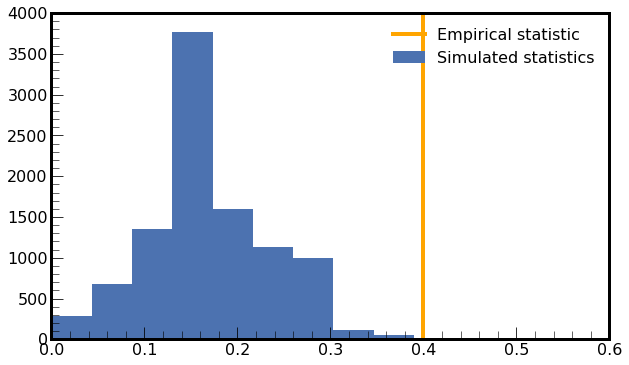

In [8]:
empirical_statistic = calculate_stats(die_tosses_30)

simualted_statistics = simulate(die_faces, die_probs, nrolls=30, reps=10000)

plt.hist(simualted_statistics, label="Simulated statistics")
plt.axvline(empirical_statistic, color='orange', label="Empirical statistic")
plt.xlim(0, 0.6)
plt.legend();

In [9]:
pvalue = np.mean(simualted_statistics > empirical_statistic)
alpha = 0.05

if pvalue <= alpha:
    print(f"""
        We reject the null hypothesis, that the dice 
        does not favor the sixes more than a fair die, because 
        the outcome of {np.sum(die_tosses_30 == 6)} sixes out of {len(die_tosses_30)} rolls has a
        the p-value of {pvalue} which is statistically significant.
    """)
else:
    print(f"""
        We cannot reject the null hypothesis, that the dice 
        the outcome of {np.sum(die_tosses_30 == 6)} "6" out of {len(die_tosses_30)} rolls has a
        the p-value of {pvalue}  which is not statistically significant.
    """)


        We reject the null hypothesis, that the dice 
        does not favor the sixes more than a fair die, because 
        the outcome of 12 sixes out of 30 rolls has a
        the p-value of 0.0005 which is statistically significant.
    


## Bootstrap Hypothesis Test

# Uncertainty

In [ ]:
dist = stats.norm(0, 1)
x = np.linspace(-5, 5, 100)

plt.plot(x, dist.pdf(x))
plt.hist(dist.rvs(10000), bins=20, density=True)
plt.show()

## Why are uncertainties Gaussian &mdash; The Photon Noise

<small>https://people.csail.mit.edu/hasinoff/pubs/hasinoff-photon-2012-preprint.pdf</small>

$$
X \sim \mathrm{Poisson}(\lambda)
$$

---

$$
P(X=x) = \frac{e^{-\lambda} (\lambda)^x}{x!} = \frac{e^{-rt} (rt)^x}{x!}
$$

$$
\text{E}[X] = \lambda \qquad
\text{Var}[X] = \lambda
$$

### Sources of Photon Noise
* 
* **Phantom noise**, photoexcitation from the thermal fluctuation within the camera itself.

# Bayesian Model